# Regresi

Regresi adalah teknik statistik yang digunakan untuk memodelkan dan menganalisis hubungan antara satu atau lebih variabel independen (predictor) dan variabel dependen (response). Tujuan utama dari regresi adalah untuk memahami hubungan ini dan membuat prediksi tentang variabel dependen berdasarkan nilai-nilai variabel independen.

1. Variabel Independen dan Dependen:
    - Variabel Independen: Variabel yang digunakan untuk memprediksi nilai variabel lain. Juga disebut sebagai predictor, explanatory, atau input variables.
    - Variabel Dependen: Variabel yang nilainya diprediksi berdasarkan variabel independen. Juga disebut sebagai response atau output variable.

2. Tujuan Regresi:
    - Estimasi Parameter: Menentukan nilai koefisien (β0,β1​) yang paling cocok dengan data.
    - Prediksi: Menggunakan model untuk memprediksi nilai variabel dependen berdasarkan nilai-nilai baru dari variabel independen.
    - Inferensi: Menguji hipotesis tentang hubungan antara variabel independen dan dependen.

3. Jenis-Jenis Regresi:
    - Regresi Linear Sederhana: Model yang memprediksi variabel dependen berdasarkan satu variabel independen.
    - Regresi Linear Berganda: Model yang memprediksi variabel dependen berdasarkan lebih dari satu variabel independen.
    - Regresi Polinomial: Model yang melibatkan variabel independen yang dipangkatkan untuk menangkap hubungan non-linear.
    - Regresi Ridge: Regresi linear dengan regularisasi L2 untuk mengurangi overfitting.
    - Regresi Lasso: Regresi linear dengan regularisasi L1 untuk menghasilkan model yang lebih sederhana dengan beberapa koefisien nol.
    - Regresi Logistik: Digunakan untuk memodelkan variabel dependen biner (misalnya, sukses/gagal).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Membuat data contoh
date_rng = pd.date_range(start='1/1/2020', end='1/01/2025', freq='M')
data = np.random.randn(len(date_rng)) + np.linspace(5, 30, len(date_rng))
ts_data = pd.DataFrame(data, index=date_rng, columns=['value'])

C:\Users\Ariful\AppData\Local\Temp\ipykernel_15040\2633813073.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='1/1/2020', end='1/01/2025', freq='M')


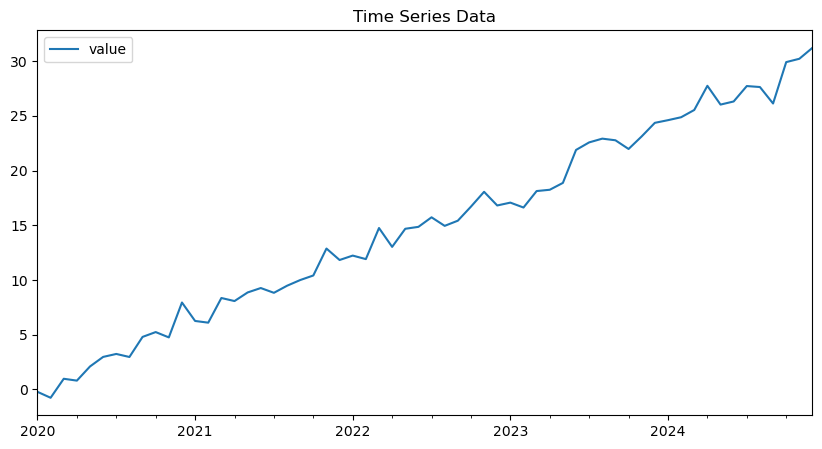

In [3]:
# Menampilkan data time series
ts_data.plot(figsize=(10, 5))
plt.title('Time Series Data')
plt.show()

In [4]:
# Membagi data menjadi training dan testing
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

In [5]:
# Membuat fitur (independent variable) untuk regresi
train['time'] = np.arange(len(train))
test['time'] = np.arange(len(train), len(train) + len(test))

C:\Users\Ariful\AppData\Local\Temp\ipykernel_15040\2981777801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['time'] = np.arange(len(train))
C:\Users\Ariful\AppData\Local\Temp\ipykernel_15040\2981777801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['time'] = np.arange(len(train), len(train) + len(test))


In [6]:
# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(train[['time']], train['value'])

LinearRegression()

In [7]:
# Melakukan peramalan
forecast_lr = model.predict(test[['time']])

In [8]:
# Menghitung error
mse = mean_squared_error(test['value'], forecast_lr)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2083316019085377


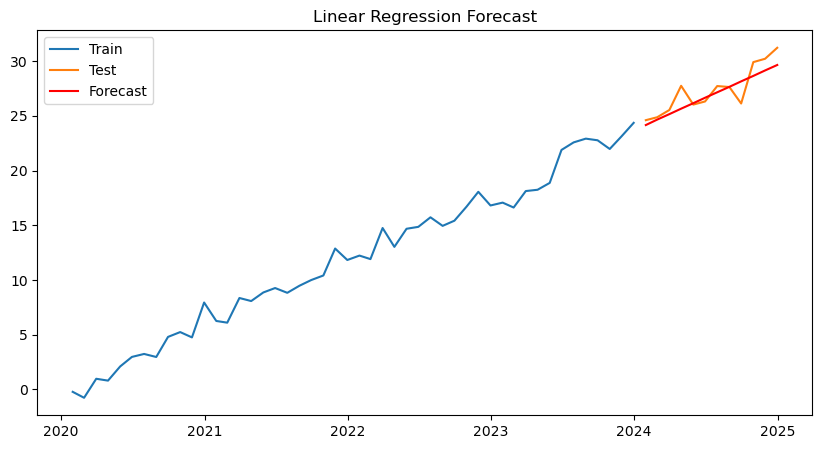

In [9]:
# Menampilkan hasil peramalan
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast_lr, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('Linear Regression Forecast')
plt.show()

In [10]:
# 2. Regresi Polinomial (degree = 2)
poly = PolynomialFeatures(degree=2)
train_poly = poly.fit_transform(train[['time']])
test_poly = poly.transform(test[['time']])
model_poly = LinearRegression()
model_poly.fit(train_poly, train['value'])
forecast_poly = model_poly.predict(test_poly)
mse_poly = mean_squared_error(test['value'], forecast_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

Mean Squared Error (Polynomial Regression): 1.7942216055994817


In [11]:
# 3. Regresi Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(train[['time']], train['value'])
forecast_ridge = model_ridge.predict(test[['time']])
mse_ridge = mean_squared_error(test['value'], forecast_ridge)
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')

Mean Squared Error (Ridge Regression): 1.209744132421193


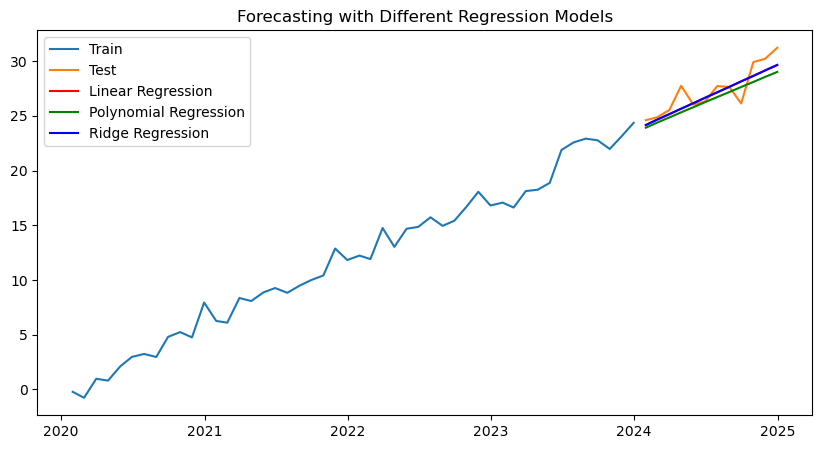

In [12]:
# Menampilkan hasil peramalan
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast_lr, label='Linear Regression', color='red')
plt.plot(test.index, forecast_poly, label='Polynomial Regression', color='green')
plt.plot(test.index, forecast_ridge, label='Ridge Regression', color='blue')
plt.legend(loc='upper left')
plt.title('Forecasting with Different Regression Models')
plt.show()